In [1]:
%load_ext nb_black
%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

<IPython.core.display.Javascript object>

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from IPython.core.display import HTML
from pylab import rcParams

In [ ]:
HTML("<style>.jp-RenderedMarkdown{display:flex;flex-direction:column;font-family:'IRANSans,Tahoma,Helvetica,sans-serif';margin-top:10px;font-size:1.1rem;direction:rtl}mark{color:#FFF;padding:3px; background-color:#AAAAAAA0}</style>")


np.random.seed(27)
rcParams["figure.figsize"] = 10, 6
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")


In [ ]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = ", accuracy_score(y_actual, y_predicted))
    print("Precision = ", precision_score(y_actual, y_predicted))
    print("Recall = ", recall_score(y_actual, y_predicted))
    print("F1 Score = ", f1_score(y_actual, y_predicted))
    display(pd.crosstab(y_actual, y_predicted, rownames=[
            "Actual"], colnames=["Predicted"]))
    pass


def generate_auc_roc_curve(clf, X_test, y_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label="AUC ROC Curve with Area Under the curve =%.2f" % auc)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()
    pass


In [76]:
data = pd.read_csv("application_train.csv")
test = pd.read_csv("application_test.csv")

<IPython.core.display.Javascript object>

In [4]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [5]:
data.shape

(307511, 122)

<IPython.core.display.Javascript object>

In [6]:
missed = data.isna().sum()
missed = missed[missed > 0]

<IPython.core.display.Javascript object>

In [7]:
remove_col = missed[(missed / 307511) > 0.15]

<IPython.core.display.Javascript object>

In [92]:
good_data = data.drop(remove_col.keys(), axis=1)
good_test = test.drop(remove_col.keys(), axis=1)

<IPython.core.display.Javascript object>

In [9]:
missed = good_data.isna().sum()
missed = missed[missed > 0]
has_nan_good_data = good_data[missed.keys()]

<IPython.core.display.Javascript object>

In [10]:
has_nan_good_data.head()

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,1.0,0.262949,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,2.0,0.622246,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,1.0,0.555912,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,2.0,0.650442,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,1.0,0.322738,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [11]:
has_nan_good_data.describe().loc["mean"]

AMT_ANNUITY                    27108.573909
AMT_GOODS_PRICE               538396.207429
CNT_FAM_MEMBERS                    2.152665
EXT_SOURCE_2                       0.514393
OBS_30_CNT_SOCIAL_CIRCLE           1.422245
DEF_30_CNT_SOCIAL_CIRCLE           0.143421
OBS_60_CNT_SOCIAL_CIRCLE           1.405292
DEF_60_CNT_SOCIAL_CIRCLE           0.100049
DAYS_LAST_PHONE_CHANGE          -962.858788
AMT_REQ_CREDIT_BUREAU_HOUR         0.006402
AMT_REQ_CREDIT_BUREAU_DAY          0.007000
AMT_REQ_CREDIT_BUREAU_WEEK         0.034362
AMT_REQ_CREDIT_BUREAU_MON          0.267395
AMT_REQ_CREDIT_BUREAU_QRT          0.265474
AMT_REQ_CREDIT_BUREAU_YEAR         1.899974
Name: mean, dtype: float64

<IPython.core.display.Javascript object>

In [93]:
good_data.fillna(value={"EXT_SOURCE_2": 0.514393}, inplace=True)
good_test.fillna(value={"EXT_SOURCE_2": 0.514393}, inplace=True)

<IPython.core.display.Javascript object>

In [13]:
missed = good_data.isna().sum()
missed = missed[missed > 0]
has_nan_good_data = good_data[missed.keys()]
has_nan_good_data.describe().loc["mean"]

AMT_ANNUITY                    27108.573909
AMT_GOODS_PRICE               538396.207429
CNT_FAM_MEMBERS                    2.152665
OBS_30_CNT_SOCIAL_CIRCLE           1.422245
DEF_30_CNT_SOCIAL_CIRCLE           0.143421
OBS_60_CNT_SOCIAL_CIRCLE           1.405292
DEF_60_CNT_SOCIAL_CIRCLE           0.100049
DAYS_LAST_PHONE_CHANGE          -962.858788
AMT_REQ_CREDIT_BUREAU_HOUR         0.006402
AMT_REQ_CREDIT_BUREAU_DAY          0.007000
AMT_REQ_CREDIT_BUREAU_WEEK         0.034362
AMT_REQ_CREDIT_BUREAU_MON          0.267395
AMT_REQ_CREDIT_BUREAU_QRT          0.265474
AMT_REQ_CREDIT_BUREAU_YEAR         1.899974
Name: mean, dtype: float64

<IPython.core.display.Javascript object>

In [94]:
good_data.fillna(np.round(has_nan_good_data.describe().loc["mean"]), inplace=True)
good_test.fillna(np.round(has_nan_good_data.describe().loc["mean"]), inplace=True)


<IPython.core.display.Javascript object>

In [15]:
missed = good_data.isna().sum()
missed = missed[missed > 0]
missed

NAME_TYPE_SUITE    1292
dtype: int64

<IPython.core.display.Javascript object>

In [16]:
good_data["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

<IPython.core.display.Javascript object>

In [95]:
final_data = good_data.fillna({"NAME_TYPE_SUITE": "Unaccompanied"})
final_test = good_test.fillna({"NAME_TYPE_SUITE": "Unaccompanied"})

<IPython.core.display.Javascript object>

In [18]:
missed = final_data.isna().sum()
missed = missed[missed > 0]
missed

Series([], dtype: int64)

<IPython.core.display.Javascript object>

In [96]:
missed = final_test.isna().sum()
missed = missed[missed > 0]
missed

Series([], dtype: int64)

<IPython.core.display.Javascript object>

In [19]:
final_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [20]:
cat_cal = final_data.select_dtypes(include="object").columns

<IPython.core.display.Javascript object>

In [21]:
from sklearn.preprocessing import LabelEncoder

<IPython.core.display.Javascript object>

In [106]:
le = LabelEncoder()
for i in cat_cal:
    final_data[i] = le.fit_transform(final_data[i])

for i in cat_cal:
    final_test[i] = le.fit_transform(final_test[i])

<IPython.core.display.Javascript object>

In [176]:
X = final_data.drop(["TARGET"], axis=1)
y = final_data["TARGET"]

<IPython.core.display.Javascript object>

In [24]:
sum(y) / len(y)

0.08072881945686496

<IPython.core.display.Javascript object>

### badly imbalanced

In [25]:
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [26]:
pca = PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

<IPython.core.display.Javascript object>

In [27]:
pca.explained_variance_ratio_

array([7.74180188e-01, 1.41630743e-01, 5.13385750e-02, 2.74176646e-02,
       5.15143218e-03, 2.13287421e-04, 3.85576382e-05, 2.24715781e-05,
       5.36030205e-06, 1.71873015e-06])

<IPython.core.display.Javascript object>

In [28]:
pca = PCA(n_components=2)
pca.fit(X)
a = pca.transform(X)

<IPython.core.display.Javascript object>

In [29]:
a = pca.transform(X)

<IPython.core.display.Javascript object>

In [30]:
X.shape

(307511, 70)

<IPython.core.display.Javascript object>

In [170]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

Accuracy =  0.9195161211648212
Precision =  0.0
Recall =  0.0
F1 Score =  0.0


Predicted,0,1
Actual,,
0,56553,4949
1,1,0


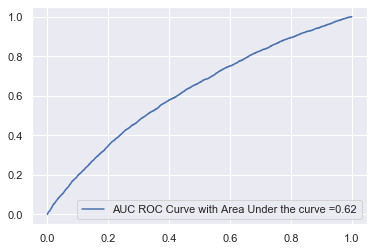

<IPython.core.display.Javascript object>

In [171]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
generate_model_report(y_pred, y_test)
generate_auc_roc_curve(model, X_test, y_test)

# weighting
### this approach will penalize the costfunction of w.through mulitpling the less weight to the majority class and vice versa


In [38]:
sum(y_train == 0), sum(y_train == 1), len(y_train)

(226132, 19876, 246008)

<IPython.core.display.Javascript object>

In [39]:
# formula = number of samples/(number of class * total number of samples)

<IPython.core.display.Javascript object>

In [40]:
out_put_weight = {0: 246008 / (2 * 226132), 1: 246008 / (19876 * 2)}

<IPython.core.display.Javascript object>

In [41]:
out_put_weight

{0: 0.543947782710983, 1: 6.188569128597304}

<IPython.core.display.Javascript object>

In [42]:
from sklearn.utils import class_weight

class_weight.compute_class_weight("balanced", np.unique(y_train), y_train)
# the sum of weights are not equal to zero but the logisticregression regiularize it anyway.

array([0.54394778, 6.18856913])

<IPython.core.display.Javascript object>

Accuracy =  0.42558899565874836
Precision =  0.6581127500505153
Recall =  0.08828232998129726
F1 Score =  0.15568089479470387


Predicted,0,1
Actual,,
0,22918,1692
1,33636,3257


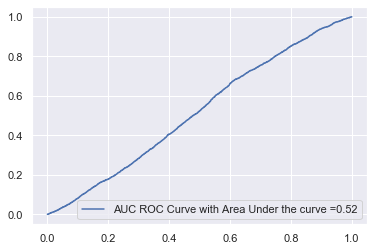

<IPython.core.display.Javascript object>

In [43]:
lin = LogisticRegression(class_weight="balanced")  # it does exactly the previous steps
lin.fit(X_train, y_train)
y_pred2 = lin.predict(X_test)
generate_model_report(y_pred2, y_test)
generate_auc_roc_curve(model, X_test, y_test)

In [44]:
weights = np.linspace(
    0.05, 0.95, 21
)  # make a list between 0.05 to 0.95 so the iterval would be (0.9 / (21-1)) = .045
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={"class_weight": [{0: x, 1: 1.0 - x} for x in weights]},
    scoring="f1",
    cv=5,
)

grid_result = gsc.fit(X_train, y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.365, 1: 0.635}}


<IPython.core.display.Javascript object>

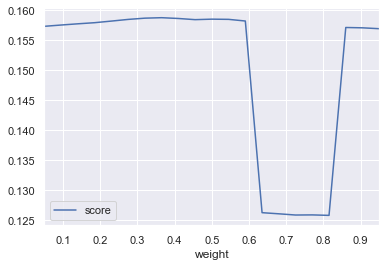

<IPython.core.display.Javascript object>

In [45]:
data_out = pd.DataFrame(
    {"score": grid_result.cv_results_["mean_test_score"], "weight": weights}
)
data_out.plot(x="weight")

In [46]:
def myFun(class_weight):
    print("arg1:", class_weight)
# Now we can use *args or **kwargs to
# pass arguments to this function : 

#myFun(*args)
myFun(**grid_result.best_params_)


arg1: {0: 0.365, 1: 0.635}


<IPython.core.display.Javascript object>

In [47]:
grid_result.best_params_

{'class_weight': {0: 0.365, 1: 0.635}}

<IPython.core.display.Javascript object>

### It means there is a class_weight variable in logistic regression and we fill it with **grid_result.best_params_

Accuracy =  0.41650000812968474
Precision =  0.6696302283289554
Recall =  0.08821806953095884
F1 Score =  0.15589791838174763


Predicted,0,1
Actual,,
0,22302,1635
1,34252,3314


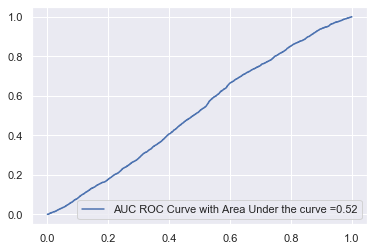

<IPython.core.display.Javascript object>

In [48]:
lin = LogisticRegression(**grid_result.best_params_)
lin.fit(X_train, y_train)
y_pred3 = lin.predict(X_test)
generate_model_report(y_pred3, y_test)
generate_auc_roc_curve(lin, X_test, y_test)

### the score is clean in the previous plot

# SMOTE

In [49]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams

<IPython.core.display.Javascript object>

In [50]:
sm = SMOTE(random_state=12, sampling_strategy=1.0)
sm_X, sm_y = sm.fit_sample(X_train, y_train)

<IPython.core.display.Javascript object>

Accuracy =  0.4259467017869047
Precision =  0.6581127500505153
Recall =  0.08833500583114101
F1 Score =  0.1557627929220469


Predicted,0,1
Actual,,
0,22940,1692
1,33614,3257


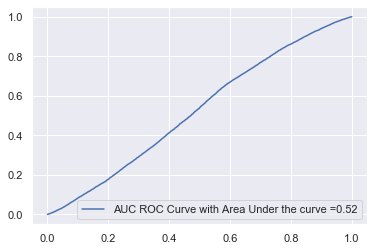

<IPython.core.display.Javascript object>

In [51]:
lin = LogisticRegression()
lin.fit(sm_X, sm_y)
y_pred4 = lin.predict(X_test)
generate_model_report(y_pred4, y_test)
generate_auc_roc_curve(lin, sm_X, sm_y)


Accuracy =  0.42714989512706697
Precision =  0.6566983228935138
Recall =  0.08835603403746296
F1 Score =  0.15575577494488643


Predicted,0,1
Actual,,
0,23021,1699
1,33533,3250


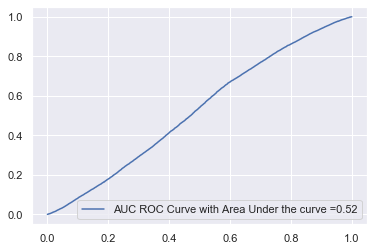

<IPython.core.display.Javascript object>

In [52]:
pipe = make_pipeline(SMOTE(), LogisticRegression())
pipe.fit(X_train, y_train)
y_pred4 = pipe.predict(X_test)
generate_model_report(y_pred4, y_test)
generate_auc_roc_curve(pipe, X_train, y_train)

In [53]:
weights = np.linspace(0.005, 1, 40)

gsc = GridSearchCV(
    estimator=pipe, param_grid={"smote__sampling_strategy": weights}, scoring="f1", cv=3
)
grid_result = gsc.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [54]:
grid_result.best_estimator_

Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.1580769230769231)),
                ('logisticregression', LogisticRegression())])

<IPython.core.display.Javascript object>

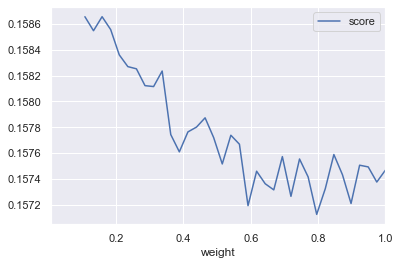

<IPython.core.display.Javascript object>

In [55]:
data_out = pd.DataFrame(
    {"score": grid_result.cv_results_["mean_test_score"], "weight": weights}
)
data_out.plot(x="weight")

Accuracy =  0.42714989512706697
Precision =  0.6566983228935138
Recall =  0.08835603403746296
F1 Score =  0.15575577494488643


Predicted,0,1
Actual,,
0,23021,1699
1,33533,3250


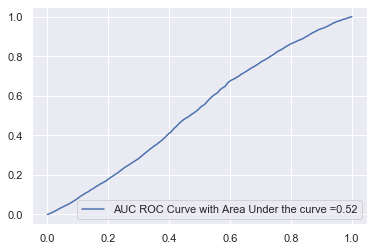

<IPython.core.display.Javascript object>

In [56]:
pipe2 = make_pipeline(SMOTE(sampling_strategy=0.1326), LogisticRegression())
pipe2.fit(X_train, y_train)
y_pred5 = pipe.predict(X_test)
generate_model_report(y_pred5, y_test)
generate_auc_roc_curve(pipe2, X_train, y_train)

# UNDERSAMPLING

In [57]:
minority_class_len = sum(y == 1)

<IPython.core.display.Javascript object>

In [58]:
minority_class_indices = final_data[final_data["TARGET"] == 1].index
majority_class_indices = final_data[final_data["TARGET"] == 0].index

<IPython.core.display.Javascript object>

In [59]:
majority_class_indices

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            307500, 307501, 307502, 307503, 307504, 307505, 307506, 307507,
            307508, 307510],
           dtype='int64', length=282686)

<IPython.core.display.Javascript object>

In [60]:
random_majority_indices = np.random.choice(
    majority_class_indices, minority_class_len, replace=False
)  # choose random of major in number of minor

<IPython.core.display.Javascript object>

In [61]:
random_majority_indices

array([299778, 127018, 189661, ..., 240369, 141137, 171334])

<IPython.core.display.Javascript object>

In [62]:
len(random_majority_indices), minority_class_len

(24825, 24825)

<IPython.core.display.Javascript object>

In [63]:
under_sample = np.concatenate([minority_class_indices, random_majority_indices])

<IPython.core.display.Javascript object>

In [64]:
under_sample

array([     0,     26,     40, ..., 240369, 141137, 171334])

<IPython.core.display.Javascript object>

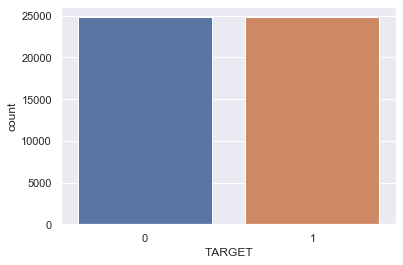

<IPython.core.display.Javascript object>

In [65]:
sns.countplot(x="TARGET", data=final_data.loc[under_sample])

In [66]:
under_data = final_data.loc[under_sample]

<IPython.core.display.Javascript object>

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    under_data.drop(["TARGET"], axis=1),
    under_data["TARGET"],
    test_size=0.2,
    random_state=42,
)

<IPython.core.display.Javascript object>

Accuracy =  0.5751258811681772
Precision =  0.5781516183986372
Recall =  0.548152634766808
F1 Score =  0.5627526168514871


Predicted,0,1
Actual,,
0,2996,1981
1,2238,2715


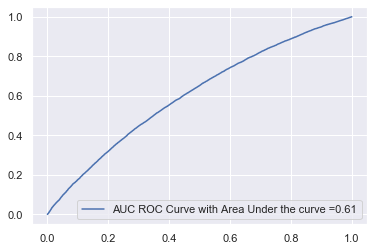

<IPython.core.display.Javascript object>

In [68]:
lin = LogisticRegression()
lin.fit(X_train, y_train)
y_pred6 = lin.predict(X_test)
generate_model_report(y_test, y_pred6)
generate_auc_roc_curve(lin, X_train, y_train)

In [69]:
from sklearn.tree import DecisionTreeClassifier

<IPython.core.display.Javascript object>

In [70]:
pca = PCA(n_components=2)
pca.fit(under_data.drop(["TARGET"], axis=1))
under_data_transformed = pca.transform(under_data.drop(["TARGET"], axis=1))

<IPython.core.display.Javascript object>

In [71]:
pca.explained_variance_ratio_

array([0.51010219, 0.43814285])

<IPython.core.display.Javascript object>

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    under_data_transformed, under_data["TARGET"], test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

Accuracy =  0.5195367573011077
Precision =  0.5182145716573259
Recall =  0.5227135069654755
F1 Score =  0.5204543170167857


Predicted,0,1
Actual,,
0,2570,2407
1,2364,2589


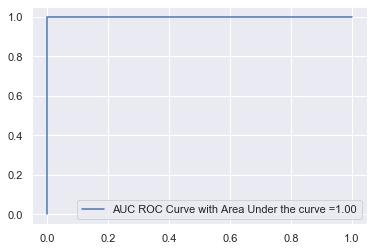

<IPython.core.display.Javascript object>

In [74]:
lin = DecisionTreeClassifier()
lin.fit(X_train, y_train)
y_pred6 = lin.predict(X_test)
generate_model_report(y_test, y_pred6)
generate_auc_roc_curve(lin, X_train, y_train)

### so under sampling works well with logistic regression

#### using imbalanced fixing

In [110]:
final_lin = LogisticRegression()
final_lin.fit(under_data.drop(["TARGET"], axis=1), under_data["TARGET"])
final_pred = final_lin.predict_proba(final_test)

<IPython.core.display.Javascript object>

In [153]:
final_prediction = final_pred[:, 1:].reshape((-1,))

<IPython.core.display.Javascript object>

In [157]:
df = pd.DataFrame({"SK_ID_CURR": final_test.SK_ID_CURR, "TARGET": final_prediction})
df.to_csv("submission.csv", index=False)

<IPython.core.display.Javascript object>

#### without using imbalnced fixing

In [177]:
final_lin = LogisticRegression()
final_lin.fit(final_data.drop(["TARGET"], axis=1), final_data["TARGET"])
final_pred2 = final_lin.predict_proba(final_test)

<IPython.core.display.Javascript object>

In [179]:
final_prediction2 = final_pred2[:, 1:].reshape((-1,))

<IPython.core.display.Javascript object>

In [180]:

df = pd.DataFrame({"SK_ID_CURR": final_test.SK_ID_CURR, "TARGET": final_prediction2})
df.to_csv("submission2.csv", index=False)

<IPython.core.display.Javascript object>